# 💡 Project Showcase: Regression Analysis for Bike-Sharing-Dataset 

*Objective of the analysis: Predication of bike rental count hourly or daily based on the environmental and seasonal settings.*

## Information about the Dataset: 

#### Features - 
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Step 1: Import the modules

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

### Step 2: Data loading and preprocessing

In [69]:
df = pd.read_csv('data/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [70]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [72]:
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Step 2: Preprocessing and EDA  

In [73]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Our dataset does not have any null values.

Let us now change the feature names to make them more readable. 

In [74]:
df1 = df.rename(columns = {'dteday':'date','weathersit':'weather','yr':'year','mnth':'month',
                          'hr':'hour',
                          'hum':'humidity',
                          'cnt':'count'
                         })
df1.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


We drop the unnecessary columns for our regression analysis like 'instant', 'date' and 'year'

In [43]:
df1 = df1.drop(columns=['instant','date','year'])

Let us now change the integer columns in our dataset that need to be used into categorical ones.

In [44]:
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df1[col] = df1[col].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis

### Average usage of bikes for all types of users and weathers

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

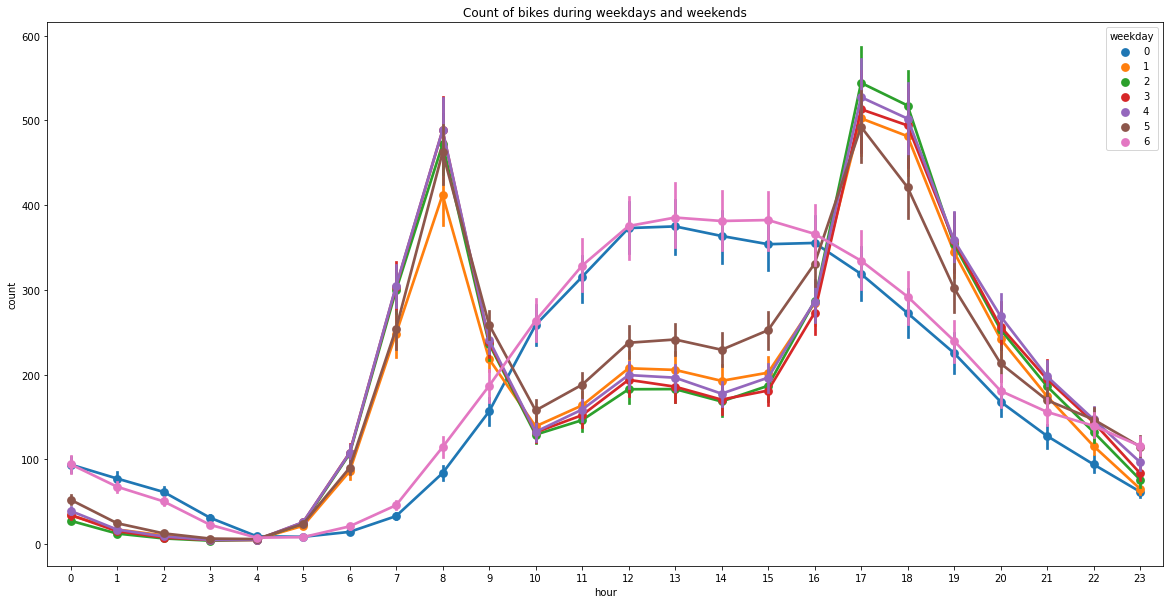

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

The above graph shows us the count of bikes for different hours of the day throughout the period of a week represented by 7 different colors. 

### Usage of bikes by Unregistered users

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

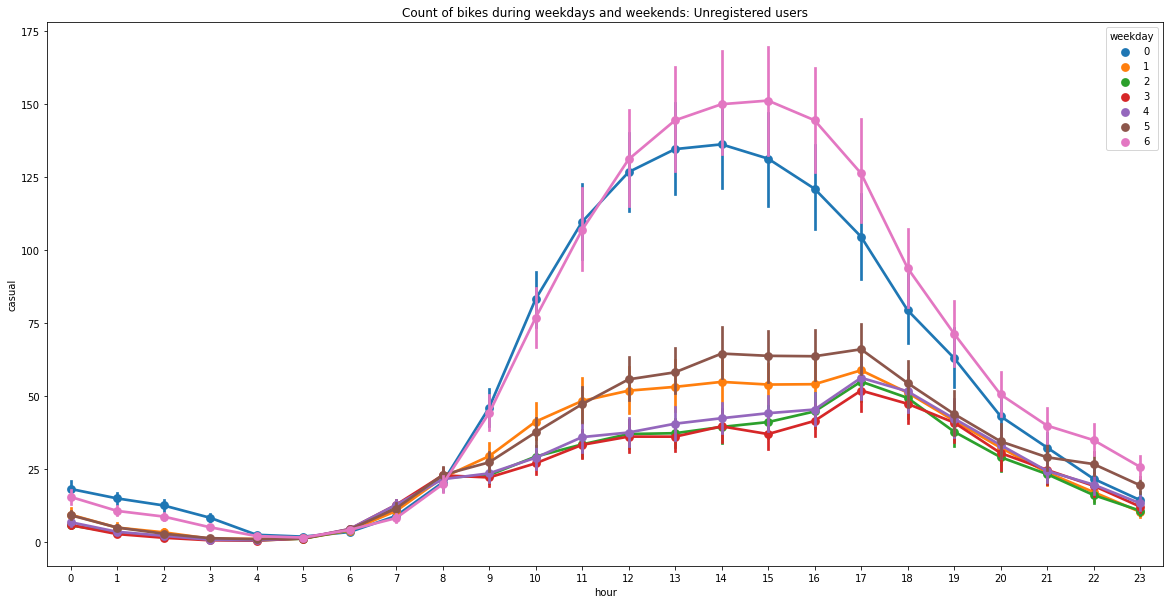

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

We now see the count of bikes througout the week for people who are unregistered in the bike-sharing mobile app. Here we see sunday and monday being the days where most bikes were rented. 

### By Registered users

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

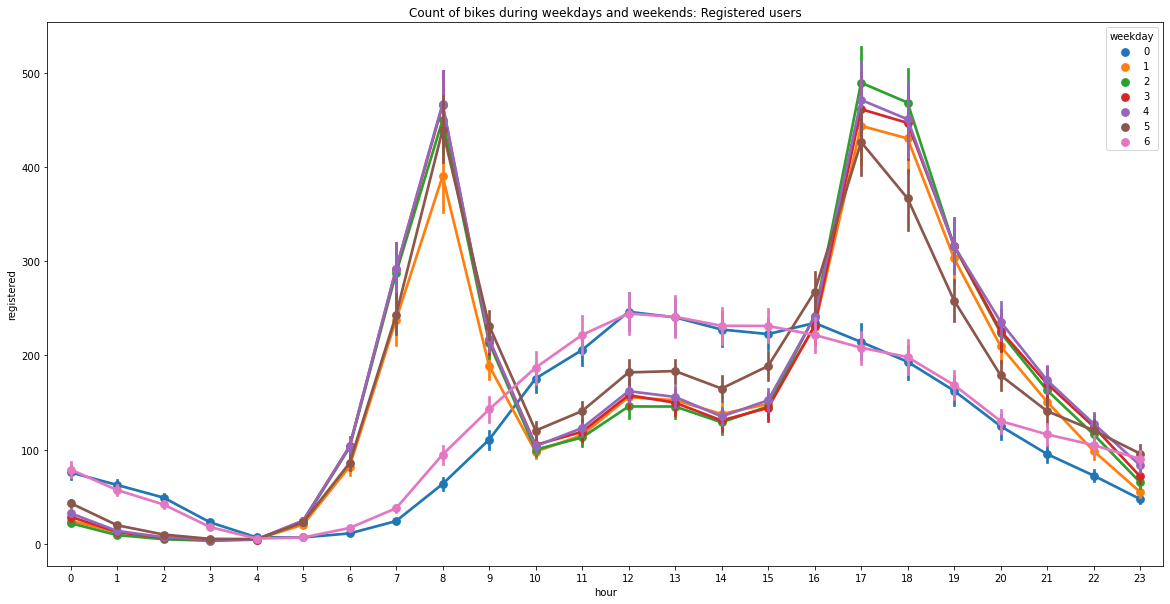

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

For registered users we see a lot of variations, with the weekdays dominating the charts with the most amount of bikes being rented instead of the weekends implying that people may need to get to work during the weekdays using these bikes and are thus more dependent on the app and have registered to it. 

### By different Weather conditions

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

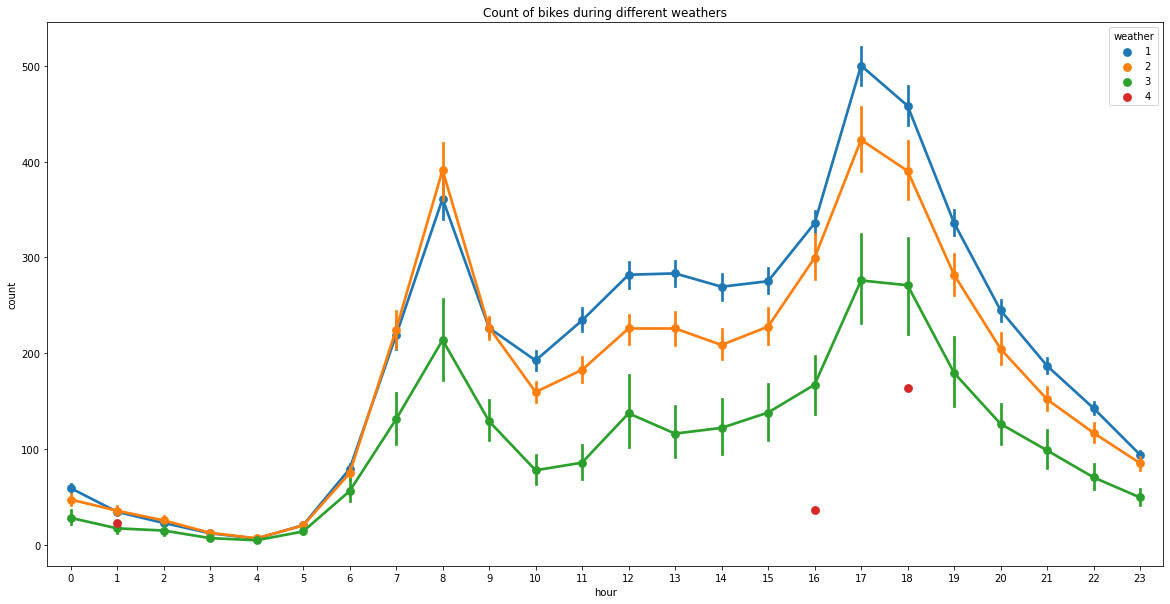

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

1. Clear, Few clouds, Partly cloudy, Partly cloudy

2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

We observe that mainly a sunny or a bit overcasted weather represented by orange and blue are the most favorable conditions for renting bikes with light snow and rain barely falling behind. However we can only see two red dots for heavy rain and thunderstorming weather which is pretty much understandable.

### By Different Seasons

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

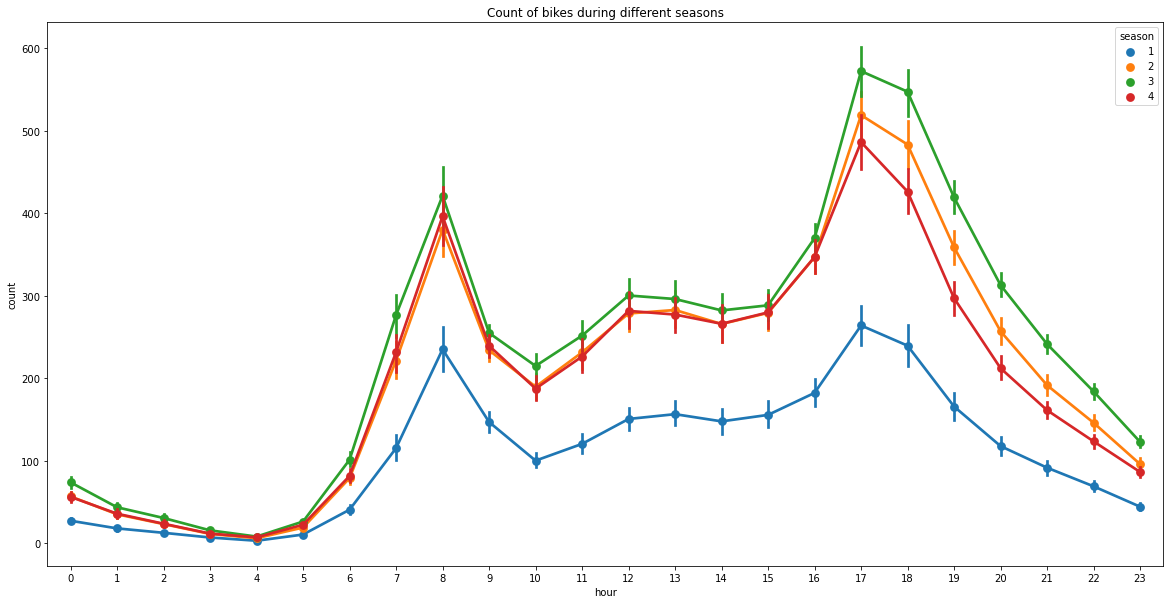

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df1, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

The weathers are categorised as
1. Spring 
2. Summer 
3. Fall 
4. Winter

We can observe that spring is the season where the least amount of bikes are being rented however in for every other season the renting of bikes is pretty much the same with Fall season being the most dominant.

### By different months

[Text(0.5, 1.0, 'Count of bikes during different months')]

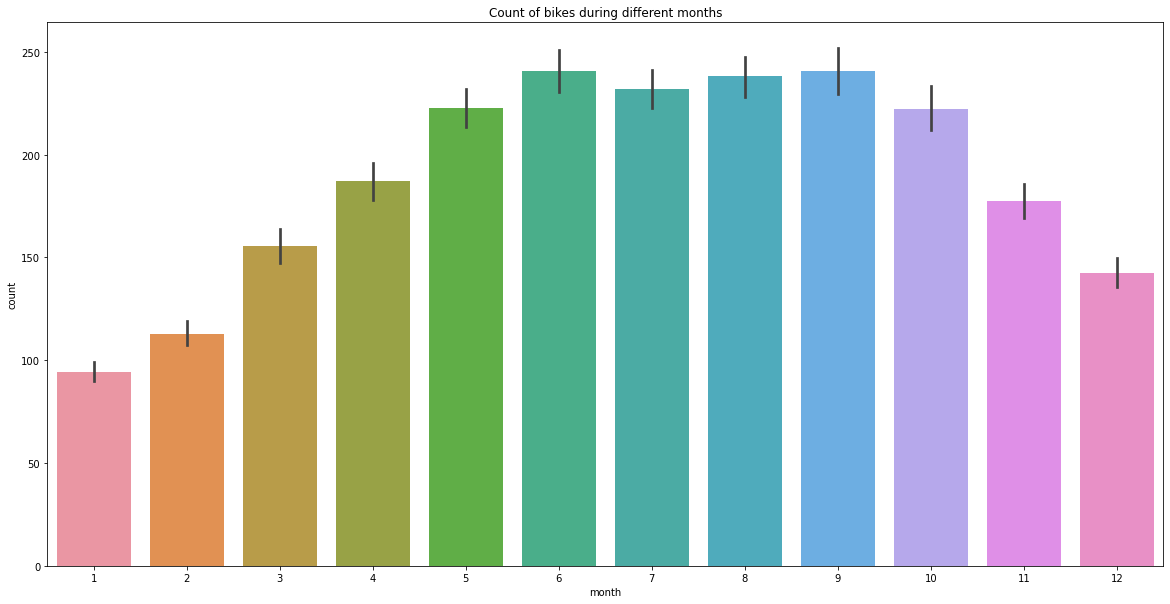

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df1, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

The months of the year pretty much imply the differnet seasons as well so if we compare the differnet seasons with relation to the months we can understand the similar results. 

### By different days

[Text(0.5, 1.0, 'Count of bikes during different days')]

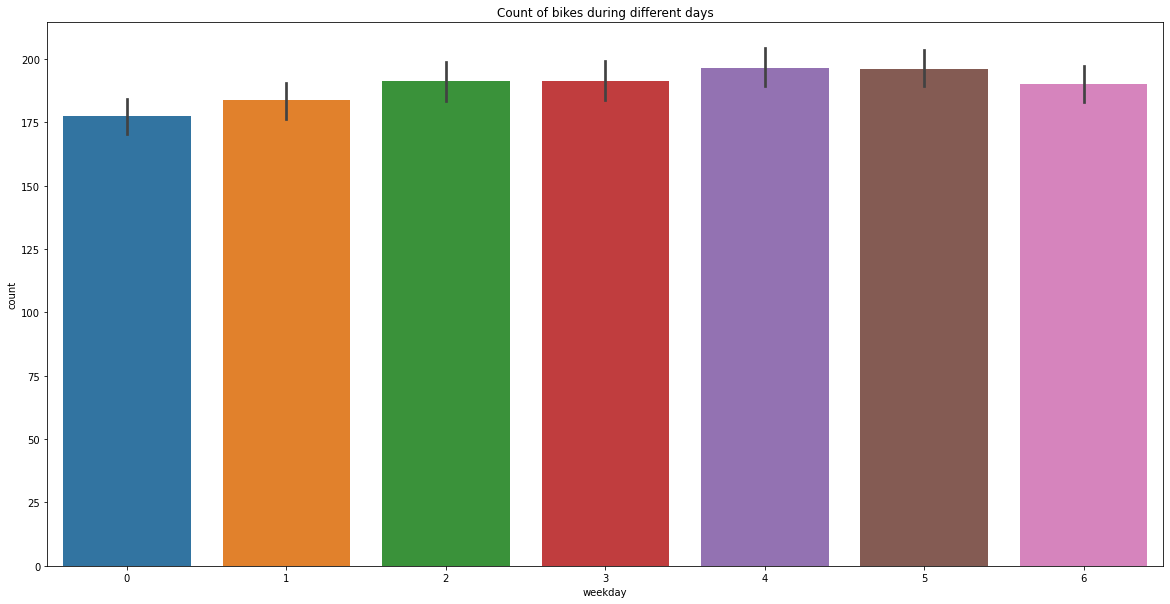

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df1, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

Since we have a mixed bag of users, we can see that the bikes are being used both by working professionals and casuals at a closely consistent rate throughout the different days

### By temperature and humidity

[Text(0.5, 1.0, 'Relation between humidity and users')]

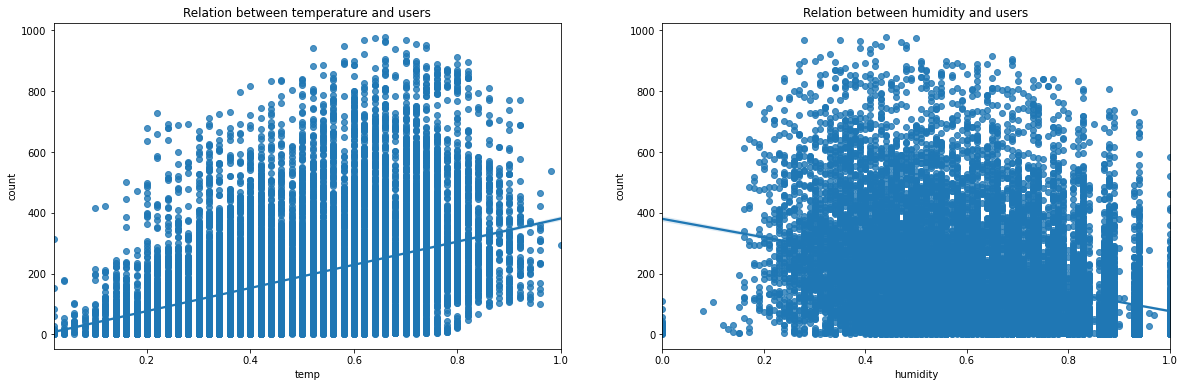

In [52]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df1['temp'], y=df1['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df1['humidity'], y=df1['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

From the above regression plots we can see that the count of bikes rentd increases with increase in temperature and decreases with increase in humidity.

### Distributional analysis: For checking the normalisation of the data

[Text(0.5, 1.0, 'Theoritical quantiles')]

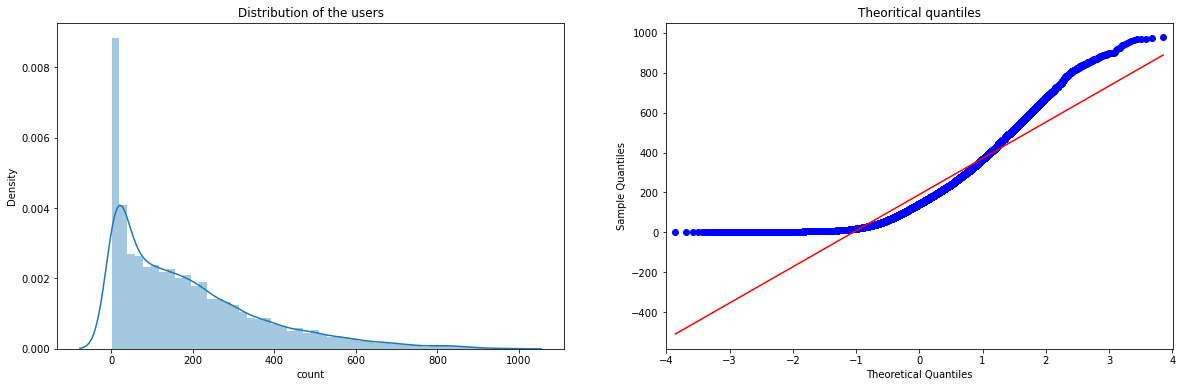

In [53]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df1['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df1['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

As we can see in the `Distribution of Users` graph, the data seems to be extremely left skewed so we need to normalise it to get better results. 

Also while observing the theoretical quantites the data don't match up with the range of values so we need to fix the range to get better results for our model.

In [54]:
df1['count'] = np.log(df1['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

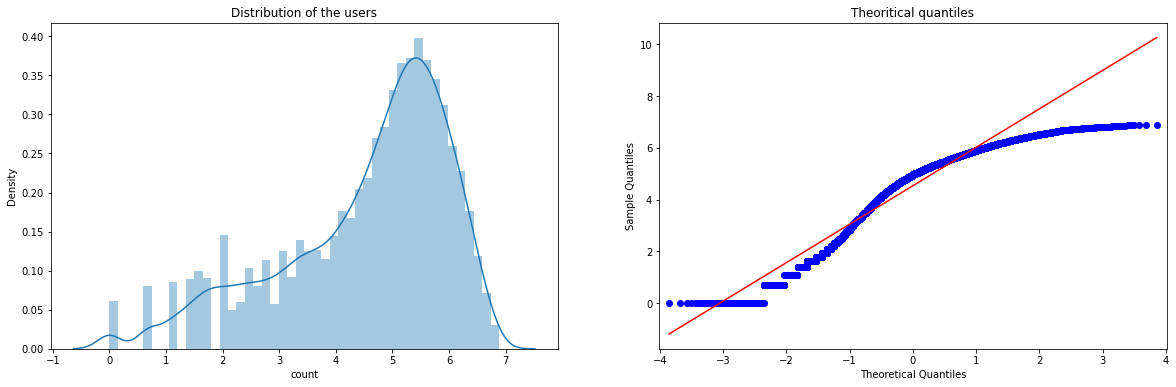

In [55]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df1['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df1['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

After normalising with `log` we find our data to be right skewed but with a much better distribution than before

Also the theoretical quantiles allows the values to line up with the regression line.

### Correlation Matrix

<AxesSubplot:>

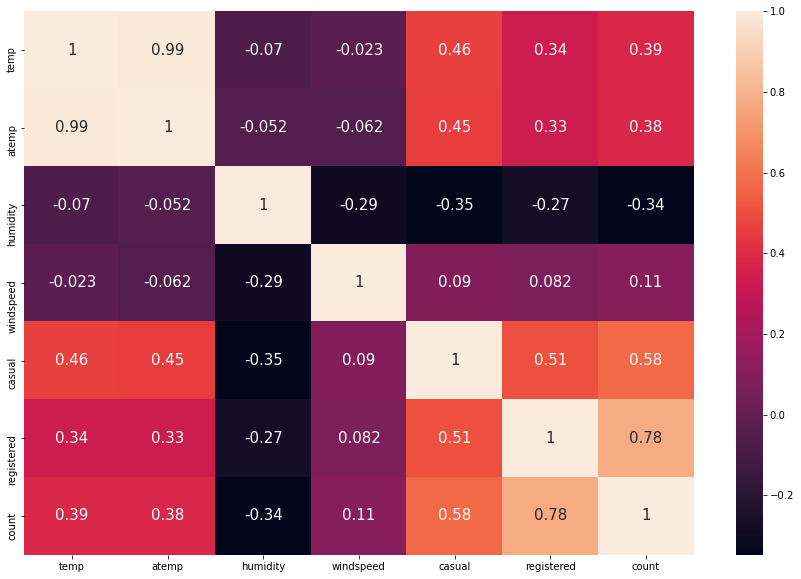

In [56]:
corr = df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

- From the confusion matrix we can see that `atemp` and `temp` represent the same pattern so we can delete `atemp`. 

- `casual` and `registered` are highly correalted to the target since adding them will give us the result so we drop them from the input as well.

- `windspeed` as well can be dropped since it is showing barely any importance for out target.

So overall we have to drop - `atemp`,`casual`,`registered`,`windspeed`



Let us now change the categorical columns with one hot encoding

In [22]:
df_2 = df1
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_2 = one_hot_encoding(df_2, col)
df_2.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Step 3: Training the Model

Let us now drop the columns we found to be irrelevant from the confusion matrix observation and split the data into the independent and dependednt variables

In [62]:
X = df1.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df1['count']

In [63]:
print(X)

      season month hour holiday weekday workingday weather  temp  humidity
0          1     1    0       0       6          0       1  0.24      0.81
1          1     1    1       0       6          0       1  0.22      0.80
2          1     1    2       0       6          0       1  0.22      0.80
3          1     1    3       0       6          0       1  0.24      0.75
4          1     1    4       0       6          0       1  0.24      0.75
...      ...   ...  ...     ...     ...        ...     ...   ...       ...
17374      1    12   19       0       1          1       2  0.26      0.60
17375      1    12   20       0       1          1       2  0.26      0.60
17376      1    12   21       0       1          1       1  0.26      0.60
17377      1    12   22       0       1          1       1  0.26      0.56
17378      1    12   23       0       1          1       1  0.26      0.65

[17379 rows x 9 columns]


Model Training

In [64]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


## Step 5 - Plotting the Line of regression
Let us now visualize our Linear Regression line and see if it gets the best-fit.

In [65]:
m = regressor.coef_

In [66]:
b = regressor.intercept_

In [67]:
# Plotting the regression line
line = m*X+b
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

TypeError: Object with dtype category cannot perform the numpy op multiply